<a href="https://colab.research.google.com/github/Jayesh-2404/House-Price-Prediction/blob/main/prediction_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Description : this program predicts if the proce of a house will be
# above the median price or not based off of its features using deep learning

# import the dependencies
from keras.models import Sequential # initialize ANN
from keras.layers import Dense # tell us the number of layers, neurons per layer  and activity
from sklearn.model_selection import train_test_split # split the data into training and testing set
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
from google.colab import files
upload = files.upload()
df = pd.read_csv('housepricedata.csv')
df.head(7) #print the first 7 rows of data

Saving housepricedata.csv to housepricedata.csv


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1


In [6]:
#covert the data into array
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [7]:
#split the data set into independent and dependent data sets
x = dataset[:,0:10] #Get all the rows from the Columns [0, 10]
y = dataset[:,10] #getting all the rows from the column at position 10


In [10]:
# use the min mAx scaler method from preprocessing scales the dataset so that all
#the features lies between 0 to 1 inclusive
min_max_scaler = MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)
x_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [14]:
#split the data into 80 percent training and 20 percent testing and validating
x_train , x_val_and_test ,y_train, y_val_and_test = train_test_split(x_scale , y , test_size= 0.2)
x_val , x_test , y_val , y_test = train_test_split(x_val_and_test , y_val_and_test , test_size=0.5)

In [16]:
#The training set has 1168 data point while the validation and test set have
#146 data points each the x  variables have 10 input features
print(x_train.shape, x_val.shape, x_test.shape , y_train.shape, y_val.shape, y_test.shape)

(1168, 10) (146, 10) (146, 10) (1168,) (146,) (146,)


In [19]:
#Build the model artitecture of the deep neural network
model = Sequential()
model.add(Dense(units=32 , activation = 'relu', input_dim =10))
model.add(Dense(units=32 , activation = 'relu'))
model.add(Dense(units=32 , activation = 'relu'))
model.add(Dense(units=1 , activation = 'sigmoid'))




In [21]:
#Loss function measures how well the model did on training and imprve them using optimization
model.compile(optimizer='sgd',
              loss = 'binary_crossentropy',
              metrics=['accuracy']
              )

In [25]:
#train the model
hist = model.fit(
            x_train, y_train,
            batch_size= 32 ,epochs = 100,
            validation_data = (x_train, y_train)
            )

Epoch 1/100
37/37 [==============================] - 2s 14ms/step - loss: 0.6904 - accuracy: 0.4957 - val_loss: 0.6878 - val_accuracy: 0.4957
Epoch 2/100
37/37 [==============================] - 0s 9ms/step - loss: 0.6856 - accuracy: 0.4957 - val_loss: 0.6831 - val_accuracy: 0.4974
Epoch 3/100
37/37 [==============================] - 0s 8ms/step - loss: 0.6814 - accuracy: 0.5000 - val_loss: 0.6796 - val_accuracy: 0.5060
Epoch 4/100
37/37 [==============================] - 0s 8ms/step - loss: 0.6783 - accuracy: 0.5154 - val_loss: 0.6769 - val_accuracy: 0.5240
Epoch 5/100
37/37 [==============================] - 0s 6ms/step - loss: 0.6758 - accuracy: 0.5437 - val_loss: 0.6743 - val_accuracy: 0.5933
Epoch 6/100
37/37 [==============================] - 0s 8ms/step - loss: 0.6732 - accuracy: 0.6027 - val_loss: 0.6717 - val_accuracy: 0.6627
Epoch 7/100
37/37 [==============================] - 0s 5ms/step - loss: 0.6705 - accuracy: 0.6807 - val_loss: 0.6690 - val_accuracy: 0.7158
Epoch 8/100


In [26]:
model.evaluate(x_test , y_test)[1]

5/5 [==============================] - 0s 5ms/step - loss: 0.3010 - accuracy: 0.9041


0.9041095972061157

In [27]:
#make a prediction
prediction = model.predict(x_test)
prediction

5/5 [==============================] - 0s 3ms/step


array([[0.01863353],
       [0.9860361 ],
       [0.01985832],
       [0.77484214],
       [0.6175543 ],
       [0.648218  ],
       [0.01823547],
       [0.04144798],
       [0.45459583],
       [0.99998474],
       [0.03462476],
       [0.93097055],
       [0.26348385],
       [0.02219522],
       [0.01656584],
       [0.9618087 ],
       [0.9832274 ],
       [0.92124087],
       [0.5236393 ],
       [0.9953187 ],
       [0.01543516],
       [0.9880034 ],
       [0.8389153 ],
       [0.02698979],
       [0.9967337 ],
       [0.92002386],
       [0.30995166],
       [0.99955153],
       [0.99831104],
       [0.01719486],
       [0.91267633],
       [0.9353361 ],
       [0.01654961],
       [0.01828971],
       [0.04299843],
       [0.01650059],
       [0.29325634],
       [0.9018352 ],
       [0.8518532 ],
       [0.9038521 ],
       [0.02161005],
       [0.01586809],
       [0.3135481 ],
       [0.99717253],
       [0.17001769],
       [0.99549663],
       [0.01856582],
       [0.486

In [30]:
prediction = model.predict(x_test)
prediction = [1 if y>= 0.90 else 0 for y in prediction]
prediction

5/5 [==============================] - 0s 2ms/step


[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1]

In [31]:
print(y_test)

[0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1
 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1
 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0
 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1]


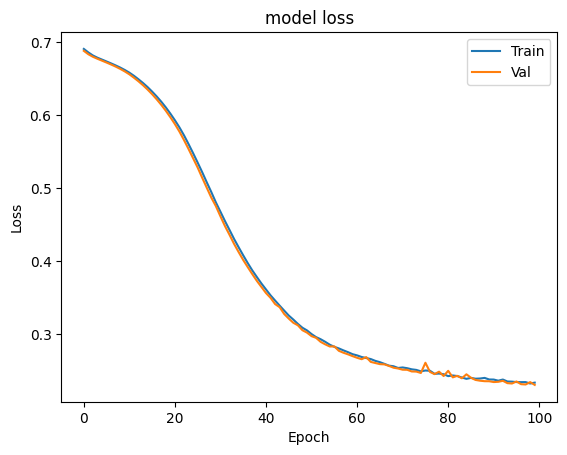

In [32]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc ='upper right')